In [ ]:
import pandas as pd

df = pd.read_csv('/content/10.csv', sep=',', header=None)
#df = pd.read_csv('10_avtorov.txt', names=['Label', 'Text'], sep='\t', lineterminator='\r')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0.004847,0.0,0.0,0.014253,0.055956,0.0,0.019916,0.050341,0.005711,0.004895,0.002567,0.000624,0.002663,0.000000,0.0,0.0,0.459318,0.053150,0.167159,0.007218,0.247375,0.030840,0.035925,0.001804,1.0,0.232119,0.002625,0.074967,0.008366,0.329560,0.037566,0.010663,0.453740,0.009350,0.001476,0.125492,0.000656,0.0,0.0,0.000328,...,0.000492,0.0,0.000000,0.00000,0.000164,0.0,0.00082,0.0,0.000328,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000656,0.0,0.0,0.000164,0.0,0.000164,0.000164,0.0,0.000164,0.0,0.001148,0.00082,0.0,0.000656,0.0,0.0,0.0,0.0,0.0,0.000328,0.0,4.892281,11.948825,0.342261
1,0.002607,0.0,0.0,0.060833,0.029982,0.0,0.084297,0.026940,0.002607,0.001738,0.007387,0.003042,0.001738,0.000000,0.0,0.0,0.334416,0.055195,0.146104,0.006494,0.123377,0.012987,0.025974,0.000000,1.0,0.116883,0.000000,0.068182,0.009740,0.298701,0.032468,0.022727,0.327922,0.003247,0.000000,0.120130,0.003247,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.003247,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.042716,19.020833,0.228571
2,0.010587,0.0,0.0,0.003529,0.065730,0.0,0.006176,0.040144,0.007941,0.006176,0.002647,0.000882,0.003529,0.000000,0.0,0.0,0.399399,0.030030,0.168168,0.000000,0.270270,0.021021,0.060060,0.000000,1.0,0.195195,0.006006,0.090090,0.006006,0.330330,0.027027,0.009009,0.399399,0.024024,0.006006,0.126126,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.859632,15.191176,0.291845
3,0.002966,0.0,0.0,0.001977,0.050916,0.0,0.013841,0.049927,0.005932,0.005438,0.000989,0.000000,0.002966,0.000000,0.0,0.0,0.465278,0.079861,0.107639,0.006944,0.236111,0.027778,0.027778,0.000000,1.0,0.163194,0.003472,0.059028,0.013889,0.295139,0.027778,0.010417,0.420139,0.003472,0.000000,0.107639,0.000000,0.0,0.0,0.003472,...,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.061927,11.179487,0.337662
4,0.006417,0.0,0.0,0.002333,0.070004,0.0,0.020418,0.060670,0.008751,0.007000,0.002333,0.000583,0.002333,0.000000,0.0,0.0,0.567460,0.067460,0.202381,0.003968,0.265873,0.035714,0.007937,0.000000,1.0,0.297619,0.000000,0.031746,0.011905,0.321429,0.051587,0.027778,0.452381,0.007937,0.000000,0.142857,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.003968,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.939884,11.233766,0.342222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,0.011188,0.0,0.0,0.008274,0.107088,0.0,0.102952,0.080199,0.014103,0.012035,0.005829,0.005735,0.013069,0.000000,0.0,0.0,0.346486,0.026510,0.430949,0.019729,0.511097,0.045623,0.130086,0.012330,1.0,0.531443,0.025277,0.333539,0.040074,0.445129,0.024661,0.009248,0.744143,0.043157,0.002466,0.116523,0.000000,0.0,0.0,0.008631,...,0.000000,0.0,0.000000,0.00185,0.000000,0.0,0.00000,0.0,0.000617,0.0,0.000617,0.0006

In [ ]:

df = pd.read_csv('/content/all_authors.csv', sep=',', skiprows=1, header=None).drop(0, 1)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,3,0.008751,0.000000,0.000000,0.0,0.002986,0.106248,0.0,0.026253,0.052815,0.002677,0.002162,0.000000,0.007413,0.010295,0.009060,0.000000,0.0,0.0,0.518542,0.076726,0.386189,0.020460,0.614450,0.025575,0.136829,0.000639,1.0,0.718670,0.012788,0.302430,0.026215,0.479540,0.023657,0.014066,0.776854,0.337277,0.092864,0.181611,0.068876,...,0.00000,0.00000,0.000000,0.000000,0.000639,0.0,0.0,0.000639,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.001279,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,3,0.008791,0.000000,0.000000,0.0,0.001726,0.052369,0.0,0.051452,0.026966,0.002049,0.001402,0.000000,0.003667,0.002589,0.003829,0.000000,0.0,0.0,0.143284,0.042910,0.125746,0.009701,0.271642,0.047388,0.093657,0.001493,1.0,0.199254,0.004851,0.176866,0.006716,0.116045,0.010821,0.004851,0.232090,0.168270,0.035704,0.091955,0.036944,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000373,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,3,0.001978,0.000000,0.000000,0.0,0.010387,0.061544,0.0,0.028476,0.036460,0.003533,0.003462,0.000071,0.003604,0.005229,0.001131,0.000000,0.0,0.0,0.532455,0.035627,0.218155,0.006345,0.330893,0.020986,0.097121,0.001464,1.0,0.201074,0.025866,0.122987,0.009761,0.435334,0.079063,0.013177,0.337726,0.209927,0.044091,0.129094,0.052782,...,0.00000,0.00000,0.000000,0.000000,0.000488,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.003416,0.000488,0.000488,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000488,0.0,0.0,0.000000,0.000000,0.0,0.000488,0.0,0.0,0.000000
3,3,0.003782,0.000000,0.000000,0.0,0.003936,0.071003,0.0,0.026703,0.025005,0.000849,0.000772,0.000000,0.004090,0.006251,0.002315,0.000000,0.0,0.0,0.584518,0.044234,0.247499,0.006319,0.367035,0.028436,0.105319,0.002633,1.0,0.255398,0.032649,0.169563,0.018957,0.467088,0.083728,0.008952,0.404950,0.228831,0.044763,0.144862,0.059427,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000527,0.000527,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001053,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000527,0.0,0.0,0.000000,0.000000,0.0,0.000527,0.0,0.0,0.000000
4,3,0.003205,0.000000,0.000000,0.0,0.002203,0.051026,0.0,0.018678,0.018027,0.001903,0.001402,0.000000,0.003105,0.002253,0.002203,0.000000,0.0,0.0,0.207641,0.046693,0.159533,0.003184,0.252211,0.042094,0.051999,0.001061,1.0,0.122037,0.010258,0.093739,0.004599,0.101521,0.013796,0.005306,0.200566,0.149271,0.035052,0.094640,0.033400,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000354,0.000354,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,5,0.005090,0.000000,0.000000,0.0,0.005567,0.081992,0.0,0.067518,0.065133,0.015349,0.013758,0.000000,0.007635,0.000398,0.006362,0.000239,0.0,0.0,0.532095,0.048986,0.233108,0.020833,0.487050,0.029279,0.117117,0.009009,1.0,0.315878,0.017455,0.253941,0.017455,0.366554,0.032658,0.011824,0.479167,0.23

In [ ]:
X = df

df['Label'] = y # labels
df.Label.unique() # see what unique values are in this column, i.e. what labels

array([1, 0, 2, 3, 4, 5, 6, 7, 8])

# Считываем файл с текстами

In [ ]:

# csv with texts
import pandas as pd
df = pd.read_csv('2_texts.csv', skiprows=1, header=None, encoding='utf-8').drop(0, 1)
#df = pd.read_csv('2_texts.csv', sep='\t')
column_names = ['Label', 'Text']
df.columns = column_names
df['Label'].unique()
y = df['Label']
X = df['Text']


In [ ]:
# this block is needed if a file with texts is loaded

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vec = CountVectorizer(ngram_range = (1,1))
X = vec.fit_transform(X.values.astype('U'))
X = X.toarray()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

'''
x_train = vec.fit_transform(x_train.values.astype('U'))
x_train = x_train.toarray()
x_test = vec.transform(x_test.values.astype('U'))
x_test = x_test.toarray()
'''

"\nx_train = vec.fit_transform(x_train.values.astype('U'))\nx_train = x_train.toarray()\nx_test = vec.transform(x_test.values.astype('U'))\nx_test = x_test.toarray()\n"

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import * 
from sklearn import svm
from sklearn.svm import SVC

import seaborn as sns           # for visualization
import matplotlib.pyplot as plt # for visualization


clf_svm = svm.LinearSVC(random_state=1, tol=1e-5)   # classifier
clf_svm.fit(x_train, y_train)                       # training
predicted_svm = clf_svm.predict(x_test)
print('SVM accuracy = '+str((metrics.accuracy_score(y_test, predicted_svm))*100)+'%') # accuracy
print('SVM F1 = '+str((f1_score(y_test, predicted_svm, average=None))*100)+'%')       # F-measure
print(classification_report(y_test, predicted_svm))


SVM accuracy = 100.0%
SVM F1 = [100. 100.]%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Accuracy: 1.00 (+/- 0.00)



0.6659917831420898


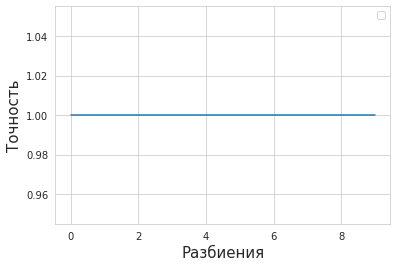

In [ ]:

'''
The simplest way to use cross validation is
cross_val_score function.

The following shows how to estimate the accuracy by splitting the data,
fitting a model and calculating an estimate 5 times in a row (with different partitions each time):
'''
import time

from sklearn.model_selection import cross_val_score 
start = time.time()
svm_scores = cross_val_score(clf_svm, X,  y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))

# график 

sns.set_style('whitegrid')
sns.lineplot(data=pd.DataFrame(data=svm_scores), dashes=False)
plt.legend('')
plt.ylabel("Точность", fontsize=15)
plt.xlabel("Разбиения", fontsize=15)
print('\n\n')
end = time.time()
print(end- start)

LR accuracy = 100.0%
LR F1 = [100. 100.]%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy: 1.00 (+/- 0.00)



0.6847763061523438


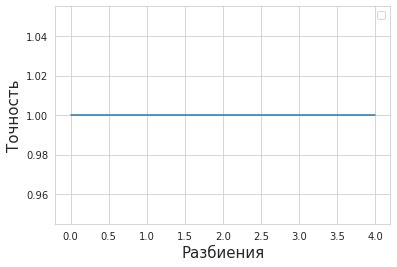

In [ ]:
#LR

from sklearn.linear_model import *
start = time.time()
clf_lr = LogisticRegression(solver='liblinear')

clf_lr.fit(x_train, y_train)
predicted_lr = clf_lr.predict(x_test)
print('LR accuracy = '+str((metrics.accuracy_score(y_test,predicted_lr))*100)+'%')
print('LR F1 = '+str((f1_score(y_test, predicted_lr, average=None))*100)+'%')
print(classification_report(y_test, predicted_lr))

lr_scores = cross_val_score(clf_lr, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

sns.set_style('whitegrid')
sns.lineplot(data=pd.DataFrame(data=lr_scores), dashes=False)
plt.legend('')
plt.ylabel("Точность", fontsize=15)
plt.xlabel("Разбиения", fontsize=15)
print('\n\n')
end = time.time()
print(end-start)

NB accuracy = 100.0%
NB F1 = [100. 100.]%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy: 1.00 (+/- 0.00)



0.3587677478790283


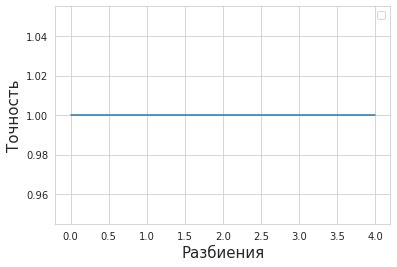

In [ ]:
#NB

from sklearn.naive_bayes import *
start = time.time()
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)
predicted_nb = clf_nb.predict(x_test)
print ('NB accuracy = '+str((metrics.accuracy_score(y_test,predicted_nb))*100)+'%')
print ('NB F1 = '+str((f1_score(y_test,predicted_nb, average=None))*100)+'%')
print(classification_report(y_test, predicted_nb))

nb_scores = cross_val_score(clf_nb, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (nb_scores.mean(), nb_scores.std() * 2))

sns.set_style('whitegrid')
sns.lineplot(data=pd.DataFrame(data=nb_scores), dashes=False)
plt.legend('')
plt.ylabel("Точность", fontsize=15)
plt.xlabel("Разбиения", fontsize=15)
print('\n\n')
end = time.time()
print(end-start)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 1 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 2 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 3 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 4 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 5 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 6 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 7 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 8 Точность: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Глубина: 9 Точность: 0.96 (+/- 0.13)





5.795322895050049


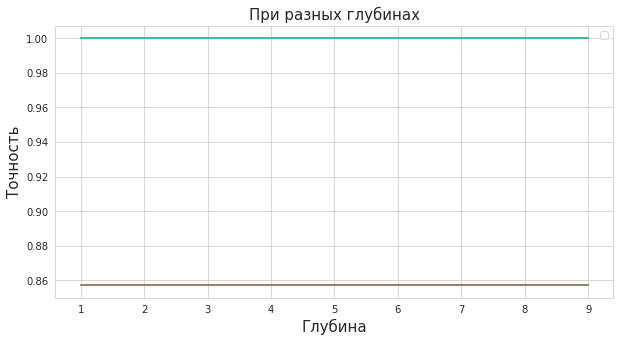

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

depths = []
DTC_accuracies = []

plt.figure(figsize=(10, 5))
start=time.time()
for depth in range(1,10):  # depth
    model = tree.DecisionTreeClassifier(random_state=1, max_depth=depth)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    dt_score = cross_val_score(model, x_train, y_train, cv=10)
    depths.append(depth)
    DTC_accuracies.append(dt_score) 
    print('Глубина:', depth, "Точность: %0.2f (+/- %0.2f)" % (dt_score.mean(), dt_score.std() * 2))
print('\n')
sns.set_style('whitegrid')
sns.lineplot(data=pd.DataFrame(data=DTC_accuracies, index=depths),dashes=False)
plt.legend('')
plt.title("При разных глубинах", fontsize=15)
plt.ylabel("Точность", fontsize=15)
plt.xlabel("Глубина", fontsize=15)
print('\n\n')
end = time.time()
print(end-start)

Кол-во деревьев: 10 Точность: 0.96 (+/- 0.00)
Кол-во деревьев: 15 Точность: 0.98 (+/- 0.01)
Кол-во деревьев: 20 Точность: 0.98 (+/- 0.01)
Кол-во деревьев: 25 Точность: 0.99 (+/- 0.01)
Кол-во деревьев: 30 Точность: 0.99 (+/- 0.01)
Кол-во деревьев: 35 Точность: 0.99 (+/- 0.01)
Кол-во деревьев: 40 Точность: 0.99 (+/- 0.01)
Кол-во деревьев: 45 Точность: 0.99 (+/- 0.01)
Кол-во деревьев: 50 Точность: 0.98 (+/- 0.00)





21.07690119743347


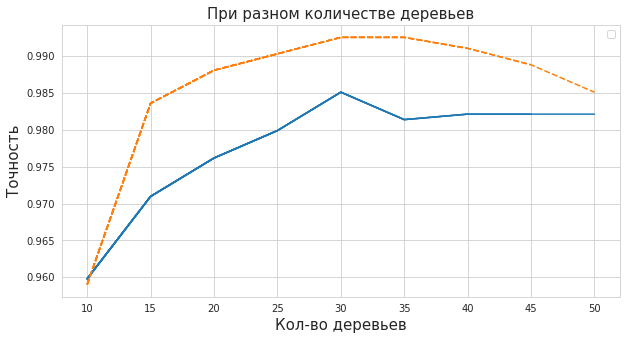

In [ ]:
# train a model of a random forest with a different number of trees in the forest

from sklearn.ensemble import RandomForestClassifier
start = time.time()
estimators = []
RFC_accuracies = []
plt.figure(figsize=(10, 5))

for estim in range(10,51,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rf_score = cross_val_score(model, x_train, y_train, cv=2)
    estimators.append(estim)
    RFC_accuracies.append(rf_score)
    print('Кол-во деревьев:', estim, 'Точность: %0.2f (+/- %0.2f)' % (rf_score.mean(), rf_score.std() * 2))
    sns.set_style('whitegrid')
    sns.lineplot(data=pd.DataFrame(data=RFC_accuracies, index=estimators),legend='brief')
    plt.legend('')
print('\n')
plt.title("При разном количестве деревьев", fontsize=15)
plt.ylabel("Точность", fontsize=15)
plt.xlabel("Кол-во деревьев", fontsize=15)
print('\n\n')
end = time.time()
print(end-start)

Кол-во соседей: 1 Точность: 1.00 (+/- 0.00)
Кол-во соседей: 4 Точность: 0.99 (+/- 0.01)
Кол-во соседей: 7 Точность: 0.99 (+/- 0.01)
Кол-во соседей: 10 Точность: 0.99 (+/- 0.01)
Кол-во соседей: 13 Точность: 0.98 (+/- 0.01)
Кол-во соседей: 16 Точность: 0.98 (+/- 0.01)
Кол-во соседей: 19 Точность: 0.98 (+/- 0.00)
Кол-во соседей: 22 Точность: 0.97 (+/- 0.01)
Кол-во соседей: 25 Точность: 0.97 (+/- 0.01)





47.46381139755249


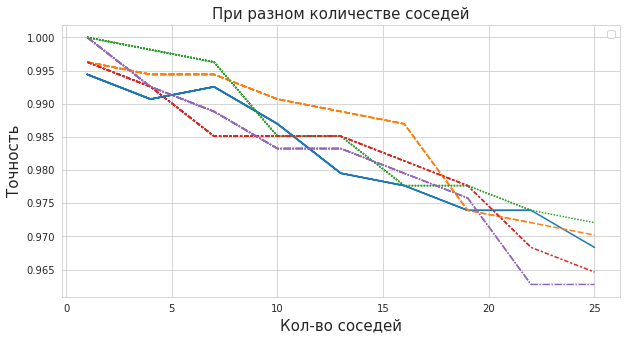

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


neighbors_list = []
KNC_accuracies = []
plt.figure(figsize=(10, 5))
start = time.time()
for neighbors in range(1, 28, 3): #1, 28, 3
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    kn_score = cross_val_score(model, x_train, y_train, cv=5)
    neighbors_list.append(neighbors)
    KNC_accuracies.append(kn_score)
    print('Кол-во соседей:', neighbors, 'Точность: %0.2f (+/- %0.2f)' % (kn_score.mean(), kn_score.std() * 2))
    sns.set_style('whitegrid')
    sns.lineplot(data=pd.DataFrame(data=KNC_accuracies, index=neighbors_list), legend='brief')
    plt.legend('')

print('\n')
plt.title("При разном количестве соседей", fontsize=15)
plt.ylabel("Точность", fontsize=15)
plt.xlabel("Кол-во соседей", fontsize=15)
print('\n\n')
end = time.time()
print(end-start)

Представим результаты по трем последним рассмотренным алгоритмам в виде таблицы для наглядного предсталения

In [ ]:
# get a table with results

from prettytable import PrettyTable

table = PrettyTable()
table.add_column('DecisionTreeClassifier', [round(max(score),2) for score in RFC_accuracies])
table.add_column('RandomForestClassifier', [round(max(score),2) for score in RFC_accuracies])
table.add_column('KNeighborsClassifier', [round(max(score),2) for score in KNC_accuracies])


print('BEST RESULTS:', '\n', table)  



BEST RESULTS: 
 +------------------------+------------------------+----------------------+
| DecisionTreeClassifier | RandomForestClassifier | KNeighborsClassifier |
+------------------------+------------------------+----------------------+
|          0.93          |          0.93          |         0.96         |
|          0.94          |          0.94          |         0.92         |
|          0.96          |          0.96          |         0.9          |
|          0.96          |          0.96          |         0.88         |
|          0.97          |          0.97          |         0.86         |
|          0.97          |          0.97          |         0.85         |
|          0.96          |          0.96          |         0.82         |
|          0.97          |          0.97          |         0.81         |
|          0.97          |          0.97          |         0.77         |
+------------------------+------------------------+----------------------+


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(x_train, y_train)
clf_score = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_score.mean(), clf_score.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.37 (+/- 0.03)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.51 (+/- 0.03) [Logistic Regression]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.42 (+/- 0.03) [Random Forest]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.49 (+/- 0.01) [naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.53 (+/- 0.02) [Ensemble]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='linear')
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft')

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTree', 'KNeighborsClassifier', 'SVC', 'VotingClassifier']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.82 (+/- 0.02) [DecisionTree]
Accuracy: 0.89 (+/- 0.01) [KNeighborsClassifier]
Accuracy: 0.62 (+/- 0.02) [SVC]
Accuracy: 0.87 (+/- 0.01) [VotingClassifier]
